### Import libraries

In [977]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### Load and inspect data

In [980]:
data=pd.read_csv('lead_conversion_dataset.csv')
data1=data
data.head()

,Name,Age,Course,Lead Source,Converted,Total Visits,Time Spent on Website,Last Activity,Country,City,...,Engagement Score,Qualification,Lead Interest Level,Contacted Hour,Days Since Last Interaction,Course Fee Offered,Potential Score,Log Time Spent on Website,Interaction Time-Hour,Interest vs Lead Quality
0,User_37309,26,Data Science,Social Media,0,29,3393,Visited Website,Canada,Sydney,...,14,High School,3,16,313,2025.482498,87,8.129764,54288,6
1,User_31838,47,Cybersecurity,Social Media,1,29,73,No Response,Canada,Toronto,...,81,High School,5,12,107,733.057986,145,4.304065,876,10
2,User_43298,28,Cloud Computing,Social Media,0,8,3820,Clicked Ad,Australia,London,...,73,PhD,2,16,37,2093.898988,16,8.248267,61120,6
3,User_49544,48,MERN Stack,Webinar,0,3,4313,Email Opened,Canada,New York,...,83,Postgraduate,5,10,358,4768.412545,15,8.369621,43130,5
4,User_2805,56,Cloud Computing,Webinar,1,8,3673,Form Submitted,USA,New York,...,15,Graduate,3,2,172,3272.637784,24,8.209036,7346,3


In [981]:
row_values = data.iloc[0].tolist()
print(row_values)

['User_37309', 26, 'Data Science', 'Social Media', 0, 29, 3393, 'Visited Website', 'Canada', 'Sydney', 'Student', 'Interested', 'Medium', 3.91, 'Email', 14, 'High School', 3, 16, 313, 2025.4824983027056, 87, 8.129764445794171, 54288, 6]


In [982]:
data.shape

(50000, 25)

In [986]:
data.columns

Index(['Name', 'Age', 'Course', 'Lead Source', 'Converted', 'Total Visits',
       'Time Spent on Website', 'Last Activity', 'Country', 'City',
       'Occupation', 'Tags', 'Lead Quality', 'Page Views Per Visit',
       'Preferred Contact Method', 'Engagement Score', 'Qualification',
       'Lead Interest Level', 'Contacted Hour', 'Days Since Last Interaction',
       'Course Fee Offered', 'Potential Score', 'Log Time Spent on Website',
       'Interaction Time-Hour', 'Interest vs Lead Quality'],
      dtype='object')

In [988]:
data.duplicated().sum()

0

In [989]:
data.isna().sum()

Name                           0
Age                            0
Course                         0
Lead Source                    0
Converted                      0
Total Visits                   0
Time Spent on Website          0
Last Activity                  0
Country                        0
City                           0
Occupation                     0
Tags                           0
Lead Quality                   0
Page Views Per Visit           0
Preferred Contact Method       0
Engagement Score               0
Qualification                  0
Lead Interest Level            0
Contacted Hour                 0
Days Since Last Interaction    0
Course Fee Offered             0
Potential Score                0
Log Time Spent on Website      0
Interaction Time-Hour          0
Interest vs Lead Quality       0
dtype: int64

In [992]:
data.dtypes

Name                            object
Age                              int64
Course                          object
Lead Source                     object
Converted                        int64
Total Visits                     int64
Time Spent on Website            int64
Last Activity                   object
Country                         object
City                            object
Occupation                      object
Tags                            object
Lead Quality                    object
Page Views Per Visit           float64
Preferred Contact Method        object
Engagement Score                 int64
Qualification                   object
Lead Interest Level              int64
Contacted Hour                   int64
Days Since Last Interaction      int64
Course Fee Offered             float64
Potential Score                  int64
Log Time Spent on Website      float64
Interaction Time-Hour            int64
Interest vs Lead Quality         int64
dtype: object

In [993]:
numcol = data.select_dtypes(include=['float64', 'int64']).columns
catcol = data.select_dtypes(include=['object']).columns

In [996]:
data[numcol]

,Age,Converted,Total Visits,Time Spent on Website,Page Views Per Visit,Engagement Score,Lead Interest Level,Contacted Hour,Days Since Last Interaction,Course Fee Offered,Potential Score,Log Time Spent on Website,Interaction Time-Hour,Interest vs Lead Quality
0,26,0,29,3393,3.91,14,3,16,313,2025.482498,87,8.129764,54288,6
1,47,1,29,73,3.95,81,5,12,107,733.057986,145,4.304065,876,10
2,28,0,8,3820,3.26,73,2,16,37,2093.898988,16,8.248267,61120,6
3,48,0,3,4313,3.25,83,5,10,358,4768.412545,15,8.369621,43130,5
4,56,1,8,3673,1.17,15,3,2,172,3272.637784,24,8.209036,7346,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,26,1,27,2613,3.69,98,5,17,333,3145.983683,135,7.868637,44421,10
49996,39,1,14,4189,2.70,81,5,7,273,1101.312873,70,8.340456,29323,5
49997,20,0,3,2624,4.83,3,4,14,332,2353.184733,12,7.872836,36736,12
49998,43,1,14,1971,4.29,88,5,18,12,1755.529229,70,7.586804,35478,15


In [998]:
data[catcol].head()

,Name,Course,Lead Source,Last Activity,Country,City,Occupation,Tags,Lead Quality,Preferred Contact Method,Qualification
0,User_37309,Data Science,Social Media,Visited Website,Canada,Sydney,Student,Interested,Medium,Email,High School
1,User_31838,Cybersecurity,Social Media,No Response,Canada,Toronto,Working Professional,Not Interested,Medium,Email,High School
2,User_43298,Cloud Computing,Social Media,Clicked Ad,Australia,London,Entrepreneur,Interested,High,Email,PhD
3,User_49544,MERN Stack,Webinar,Email Opened,Canada,New York,Entrepreneur,Needs More Info,Low,SMS,Postgraduate
4,User_2805,Cloud Computing,Webinar,Form Submitted,USA,New York,Entrepreneur,High Priority,Low,SMS,Graduate


In [1000]:
for col in catcol:
    if data[col].dtype=='O':
        print('column name:',col)
        print(data[col].unique())

column name: Name
['User_37309' 'User_31838' 'User_43298' ... 'User_25540' 'User_44374'
 'User_6533']
column name: Course
['Data Science' 'Cybersecurity' 'Cloud Computing' 'MERN Stack'
 'Data Analytics' 'AI & ML' 'Python Fullstack']
column name: Lead Source
['Social Media' 'Webinar' 'Website' 'Email Campaign' 'Referral']
column name: Last Activity
['Visited Website' 'No Response' 'Clicked Ad' 'Email Opened'
 'Form Submitted']
column name: Country
['Canada' 'Australia' 'USA' 'India' 'UK']
column name: City
['Sydney' 'Toronto' 'London' 'New York' 'Mumbai']
column name: Occupation
['Student' 'Working Professional' 'Entrepreneur' 'Unemployed']
column name: Tags
['Interested' 'Not Interested' 'Needs More Info' 'High Priority'
 'Will Contact Later']
column name: Lead Quality
['Medium' 'High' 'Low']
column name: Preferred Contact Method
['Email' 'SMS' 'Call']
column name: Qualification
['High School' 'PhD' 'Postgraduate' 'Graduate' 'Undergraduate']


In [1002]:
correct_pairings = {
    'Canada': 'Toronto',
    'Australia': 'Sydney',
    'USA': 'New York',
    'India': 'Mumbai',
    'UK': 'London'
}

# Update the DataFrame with correct cities
data['City'] = data['Country'].map(correct_pairings)

In [1004]:
country_counts = data['Country'].value_counts()
city_counts = data['City'].value_counts()

# Display results
print("Country Counts:")
print(country_counts)
print("\nCity Counts:")
print(city_counts)

Country Counts:
Country
India        10089
Australia    10026
UK            9984
Canada        9978
USA           9923
Name: count, dtype: int64

City Counts:
City
Mumbai      10089
Sydney      10026
London       9984
Toronto      9978
New York     9923
Name: count, dtype: int64


### Summary

In [1007]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Name                         50000 non-null  object 
 1   Age                          50000 non-null  int64  
 2   Course                       50000 non-null  object 
 3   Lead Source                  50000 non-null  object 
 4   Converted                    50000 non-null  int64  
 5   Total Visits                 50000 non-null  int64  
 6   Time Spent on Website        50000 non-null  int64  
 7   Last Activity                50000 non-null  object 
 8   Country                      50000 non-null  object 
 9   City                         50000 non-null  object 
 10  Occupation                   50000 non-null  object 
 11  Tags                         50000 non-null  object 
 12  Lead Quality                 50000 non-null  object 
 13  Page Views Per V

In [1009]:
data.describe()

,Age,Converted,Total Visits,Time Spent on Website,Page Views Per Visit,Engagement Score,Lead Interest Level,Contacted Hour,Days Since Last Interaction,Course Fee Offered,Potential Score,Log Time Spent on Website,Interaction Time-Hour,Interest vs Lead Quality
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,38.528860,0.500960,14.985600,2490.864440,2.999563,50.662840,3.399280,11.485080,181.648660,2744.749197,50.971540,7.513981,28548.968280,6.798300
std,12.137118,0.500004,8.365328,1440.997603,1.152720,28.902701,1.356323,6.898366,105.144475,1304.035431,36.782737,0.994579,25760.251798,4.032223
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,217.738421,1.000000,0.693147,0.000000,1.000000
25%,28.000000,0.000000,8.000000,1252.000000,2.000000,26.000000,2.000000,6.000000,91.000000,1619.064361,20.000000,7.133296,7274.250000,4.000000
50%,39.000000,1.000000,15.000000,2485.000000,3.000000,51.000000,3.000000,11.000000,182.000000,2737.462061,44.000000,7.818430,21231.500000,6.000000
75%,49.000000,1.000000,22.000000,3738.000000,4.000000,76.000000,5.000000,17.000000,272.000000,3869.862516,75.000000,8.226573,43692.500000,10.000000
max,59.000000,1.000000,29.000000,4999.000000,5.000000,100.000000,5.000000,23.000000,364.000000,5298.547507,145.000000,8.517193,114931.000000,15.000000


### Feature Engineering

In [1012]:
Course=LabelEncoder()
LeadSource=LabelEncoder()
LastActivity=LabelEncoder()
Occupation=LabelEncoder()
Tags=LabelEncoder()
LeadQuality=LabelEncoder()
PreferredContactMethod=LabelEncoder()
Qualification=LabelEncoder()
co=LabelEncoder()
co1=LabelEncoder()

In [1014]:
data['Course']=Course.fit_transform(data['Course'])
data['Lead Source']=LeadSource.fit_transform(data['Lead Source'])
data['Last Activity']=LastActivity.fit_transform(data['Last Activity'])
data['Occupation']=Occupation.fit_transform(data['Occupation'])
data['Tags']=Tags.fit_transform(data['Tags'])
data['Lead Quality']=LeadQuality.fit_transform(data['Lead Quality'])
data['Preferred Contact Method']=PreferredContactMethod.fit_transform(data['Preferred Contact Method'])
data['Qualification']=Qualification.fit_transform(data['Qualification'])
data['City']=co1.fit_transform(data['City'])
data['Country']=co.fit_transform(data['Country'])

In [1016]:
encoders = {
    "Course": Course,
    "LeadSource": LeadSource,
    "LastActivity": LastActivity,
    "Occupation": Occupation,
    "Tags": Tags,
    "LeadQuality": LeadQuality,
    "PreferredContactMethod": PreferredContactMethod,
    "Qualification": Qualification,
    "co": co,
    "co1": co1
}

In [1018]:
pickle.dump(encoders, open('encoder.pkl','wb'))

### Cleaning

In [1021]:
data.drop('Name',axis=1,inplace=True)

In [1023]:
data.duplicated().sum()

0

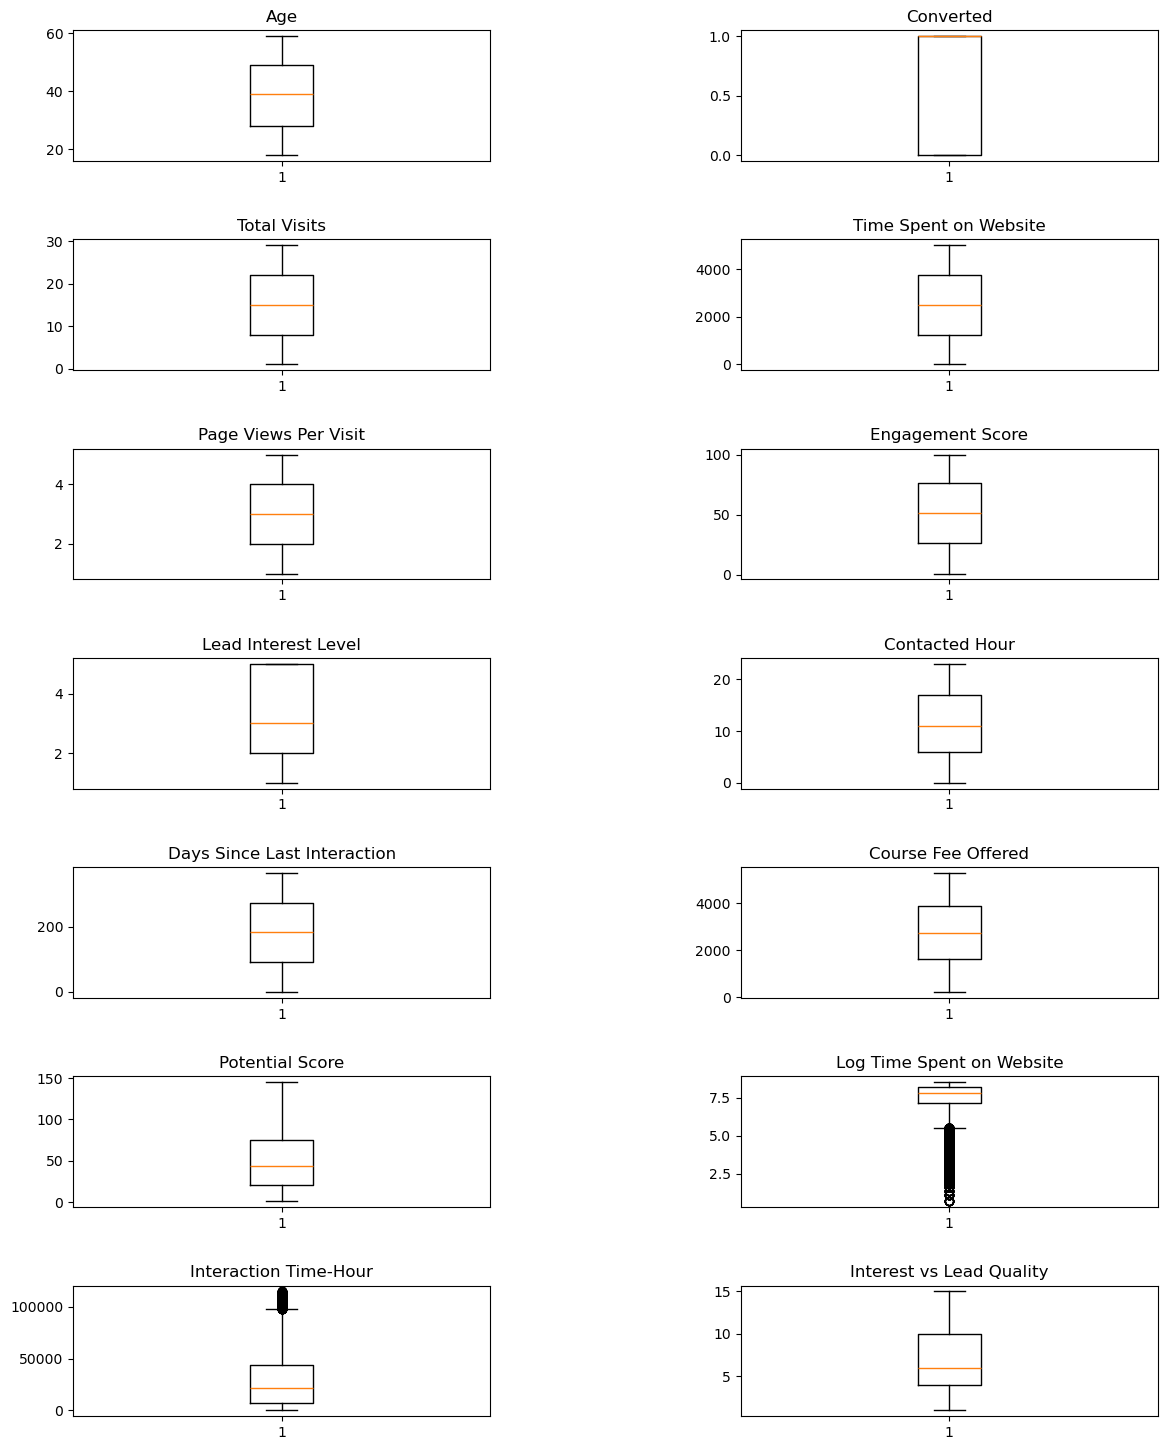

In [1025]:
a=1
plt.figure(figsize=(14,18))
for i in numcol:
    plt.subplots_adjust(wspace=0.6,hspace=0.6)
    plt.subplot(7,2,a)
    a=a+1
    plt.boxplot(data[i])
    plt.title(i)            

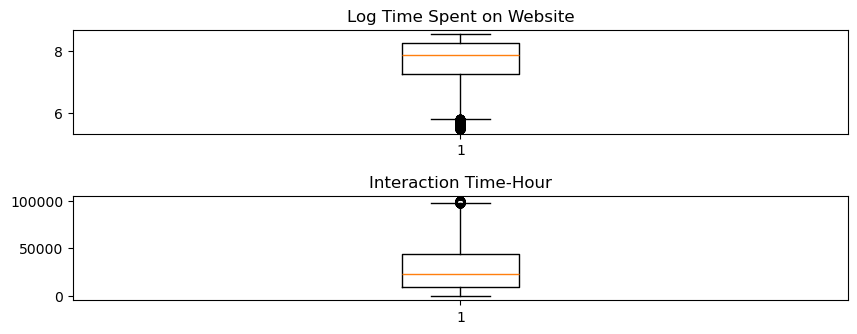

In [1026]:
y=['Log Time Spent on Website','Interaction Time-Hour']

a=1
plt.figure(figsize=(10,10))
for i in y:
    Q1=data[i].quantile(.25)
    Q3=data[i].quantile(.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    higher=Q3+1.5*IQR
    ui=np.where(data[i] >= higher)[0]
    li=np.where(data[i] <= lower)[0]

    data.drop(index=ui,inplace=True)
    data.drop(index=li,inplace=True)

    plt.subplots_adjust(wspace=0.6,hspace=0.6)
    plt.subplot(5,1,a)
    a=a+1
    plt.boxplot(data[i])
    plt.title(i)

    data.reset_index(inplace=True)
    data.drop('index',axis=1,inplace=True)

In [1027]:
data.shape

(46987, 24)

In [1028]:
data.corr()

,Age,Course,Lead Source,Converted,Total Visits,Time Spent on Website,Last Activity,Country,City,Occupation,...,Engagement Score,Qualification,Lead Interest Level,Contacted Hour,Days Since Last Interaction,Course Fee Offered,Potential Score,Log Time Spent on Website,Interaction Time-Hour,Interest vs Lead Quality
Age,1.000000,-0.001457,0.000996,-0.003115,-0.002319,0.005290,-0.003092,-0.007872,0.010675,-0.001872,...,0.000534,-0.002816,0.003747,-0.002286,0.006882,-0.000938,0.000929,0.004487,0.003347,0.003655
Course,-0.001457,1.000000,-0.000869,-0.002162,-0.001887,-0.002601,0.001980,-0.001063,0.002912,0.005563,...,0.001734,-0.002034,0.002177,0.000337,0.003970,0.004621,0.002604,-0.003797,-0.003919,0.001825
Lead Source,0.000996,-0.000869,1.000000,0.007375,0.000817,-0.005612,0.001746,0.003294,-0.004623,-0.004213,...,-0.001559,0.001658,-0.004590,0.000281,0.001848,0.003983,-0.000323,-0.004830,-0.003073,-0.005070
Converted,-0.003115,-0.002162,0.007375,1.000000,-0.006097,0.000526,-0.000694,0.009483,-0.008692,0.001792,...,0.005190,-0.003427,0.296066,-0.007129,0.002174,0.001542,0.158635,0.000423,-0.003750,0.192587
Total Visits,-0.002319,-0.001887,0.000817,-0.006097,1.000000,0.001108,-0.002925,-0.004268,0.012824,-0.002624,...,0.000149,0.003509,0.002473,0.002327,-0.014159,-0.000065,0.773687,-0.000876,0.003432,0.002036
Time Spent on Website,0.005290,-0.002601,-0.005612,0.000526,0.001108,1.000000,-0.001938,-0.003898,0.006346,-0.002794,...,-0.000188,-0.003570,-0.007886,-0.033379,0.003488,-0.000916,-0.005186,0.943328,0.597062,-0.004467
Last Activity,-0.003092,0.001980,0.001746,-0.000694,-0.002925,-0.001938,1.000000,0.000819,-0.000776,-0.000372,...,-0.001819,0.004510,-0.001696,0.008084,-0.003908,0.006437,-0.002292,-0.001632,0.004146,-0.001299
Country,-0.007872,-0.001063,0.003294,0.009483,-0.004268,-0.003898,0.000819,1.000000,-0.600351,0.005024,...,-0.002494,0.001107,0.009684,0.002804,0.000068,0.000677,0.002386,-0.004029,0.002172,0.011165
City,0.010675,0.002912,-0.004623,-0.008692,0.012824,0.006346,-0.000776,-0.600351,1.000000,-0.000761,...,-0.001529,-0.001646,-0.002297,-0.001479,-0.003891,-0.005118,0.010078,0.006651,0.000326,-0.003516
Occupation,-0.001872,0.005563,-0.004213,0.001792,-0.002624,-0.002794,-0.000372,0.005024,-0.000761,1.000000,...,0.001727,-0.003561,0.001177,-0.002738,-0.000625,0.001719,-0.000763,-0.001740,-0.003127,0.008958


### Visualisation

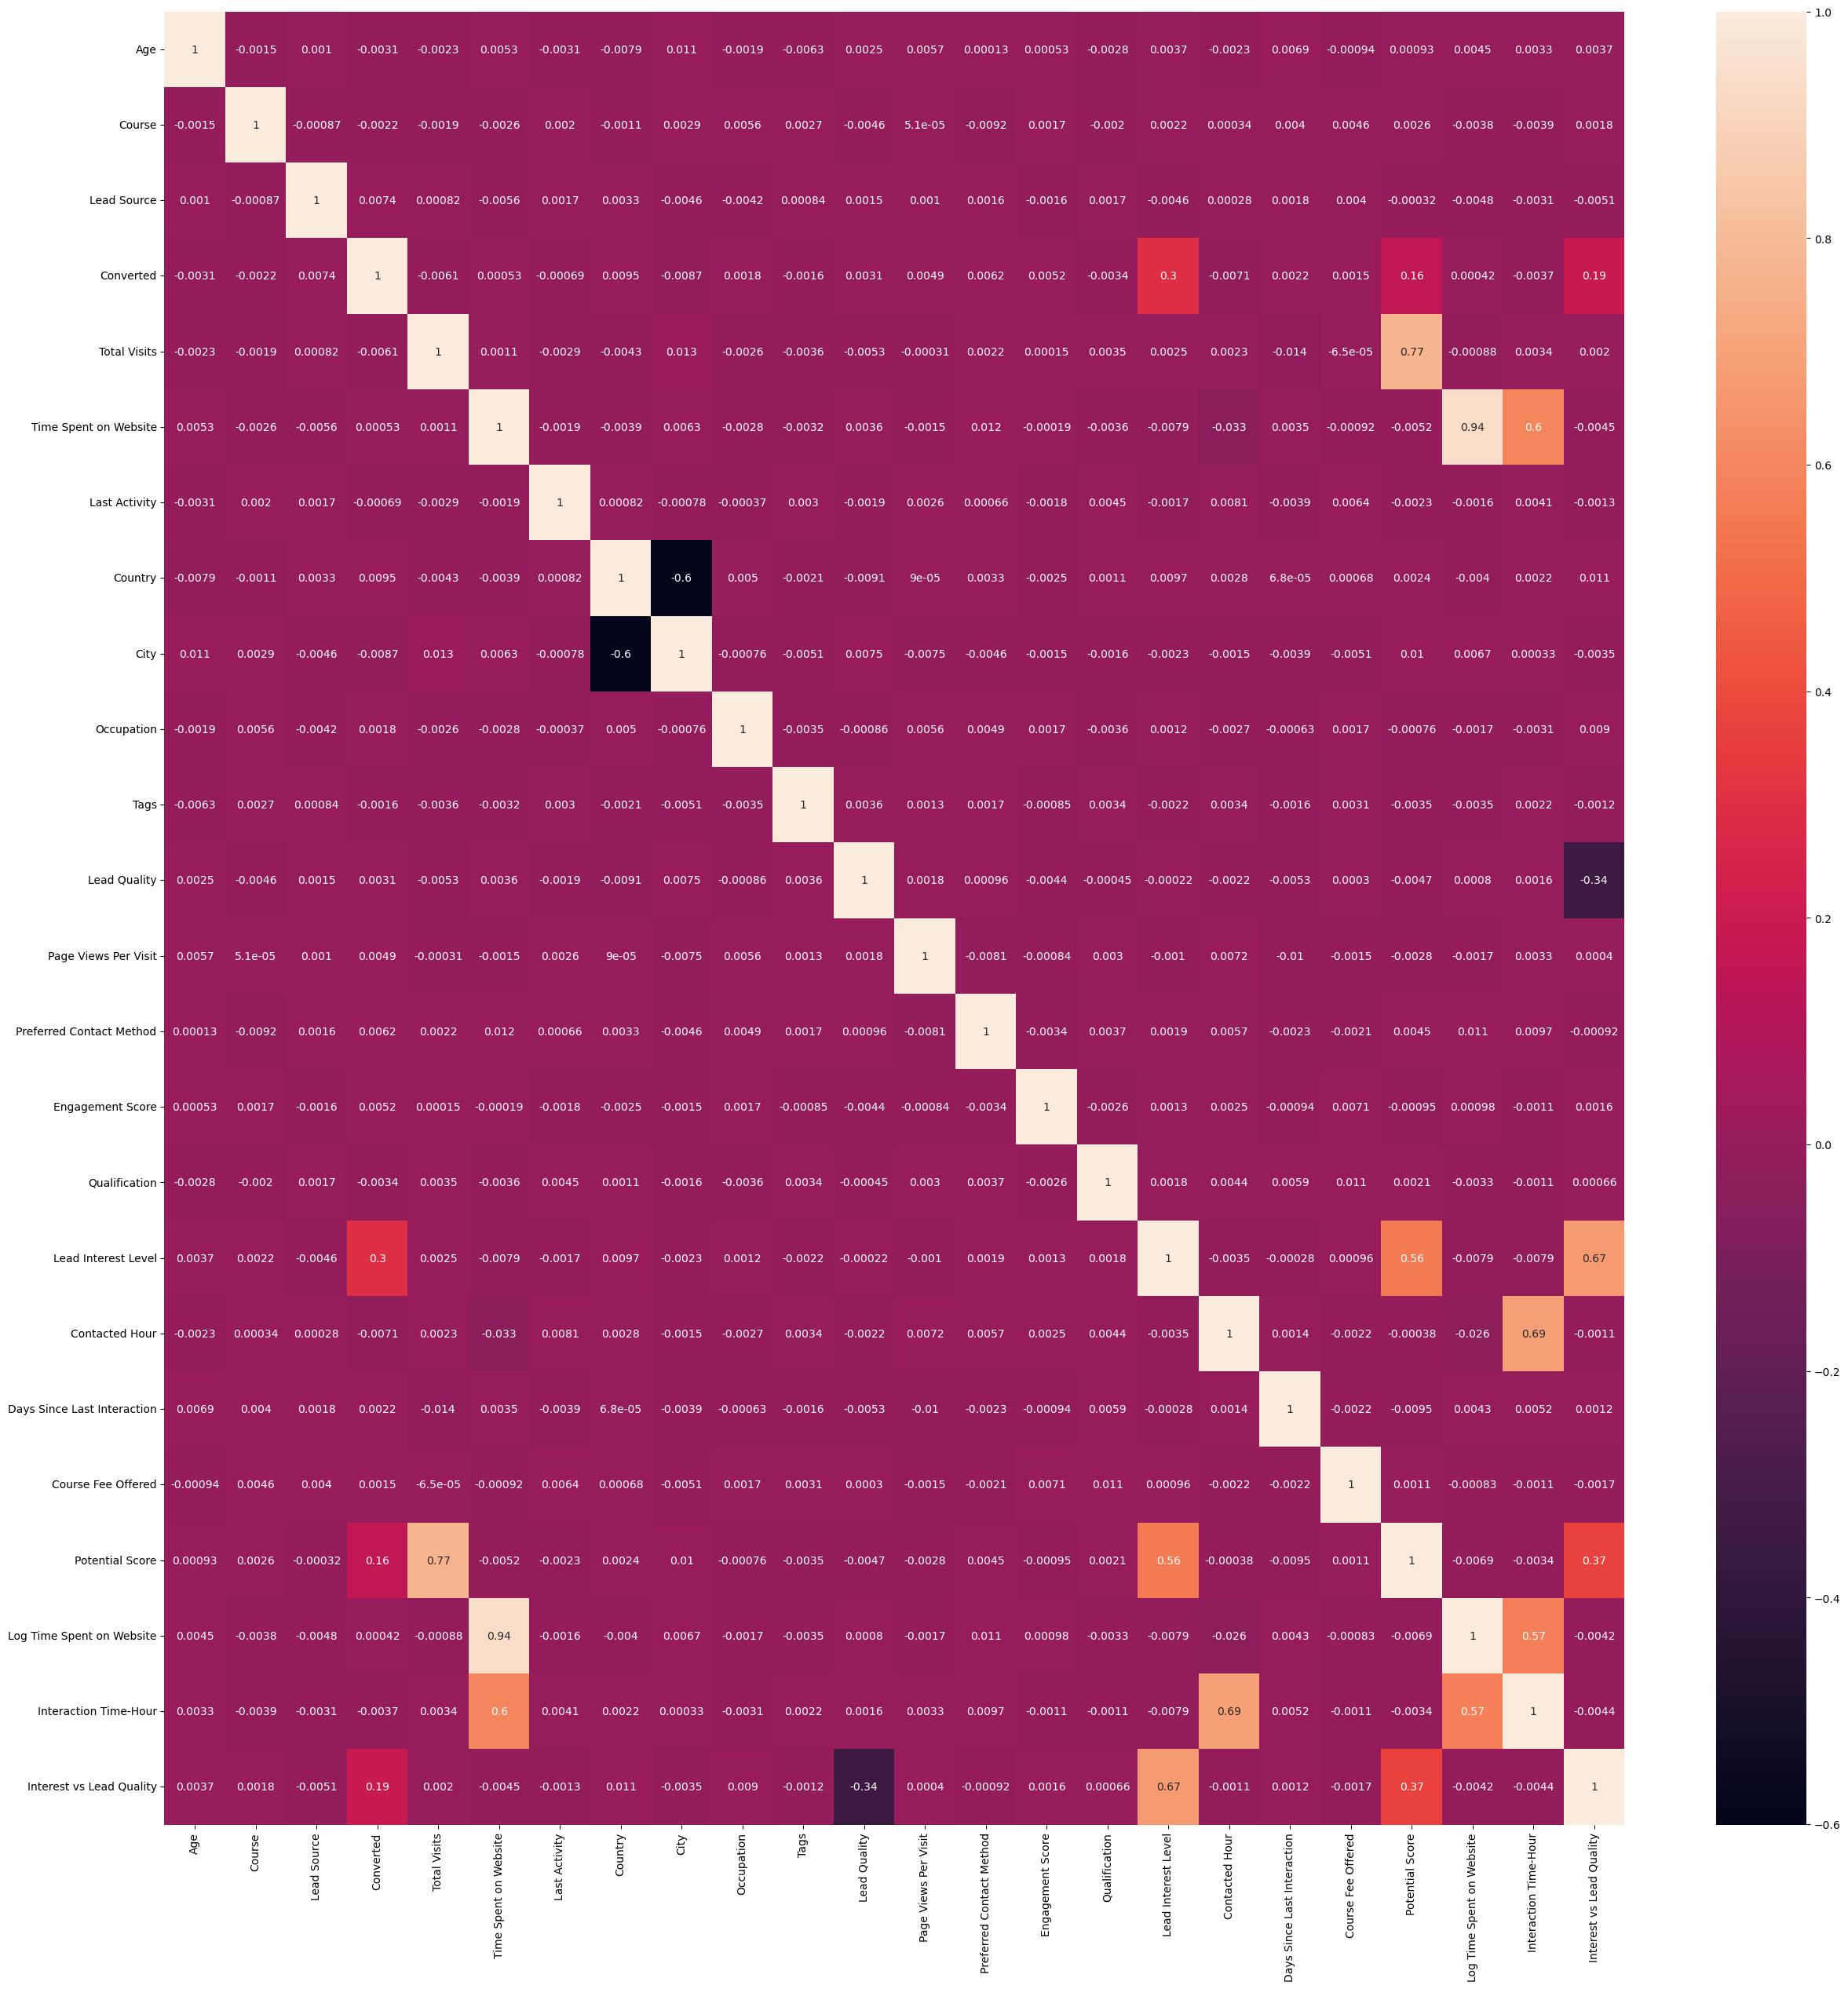

In [1030]:
import  seaborn as sns
plt.figure(figsize=(30, 30))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [1031]:
def correlation(data,threshold):
    col_corr=set()
    cor_matrix=data.corr()
    for i in range(len(cor_matrix.columns)):
        for j in range(i):
            if abs(cor_matrix.iloc[i,j]>=threshold):
                colname=cor_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
corr_features=correlation(data,.90) 
len(set(corr_features))

1

In [1033]:
corr_features

{'Log Time Spent on Website'}

In [1034]:
aa=[ 'Interest vs Lead Quality','Log Time Spent on Website','Interaction Time-Hour']
data.drop(aa,axis=1,inplace=True)

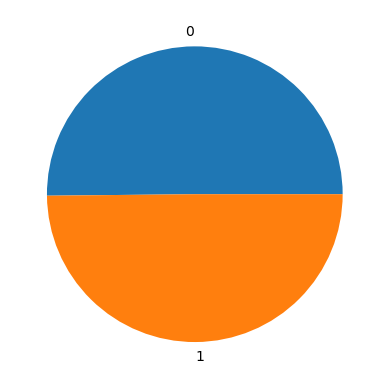

In [1038]:
count=data.Converted.value_counts() 
labels= data.Converted.unique() 
plt.pie(x=count,labels=labels)
plt.savefig('plot1.png')

In [1039]:
data.columns

Index(['Age', 'Course', 'Lead Source', 'Converted', 'Total Visits',
       'Time Spent on Website', 'Last Activity', 'Country', 'City',
       'Occupation', 'Tags', 'Lead Quality', 'Page Views Per Visit',
       'Preferred Contact Method', 'Engagement Score', 'Qualification',
       'Lead Interest Level', 'Contacted Hour', 'Days Since Last Interaction',
       'Course Fee Offered', 'Potential Score'],
      dtype='object')

### Spliting the data

In [1041]:
y=data['Converted']
x=data.drop('Converted',axis=1)

In [1044]:
x

,Age,Course,Lead Source,Total Visits,Time Spent on Website,Last Activity,Country,City,Occupation,Tags,Lead Quality,Page Views Per Visit,Preferred Contact Method,Engagement Score,Qualification,Lead Interest Level,Contacted Hour,Days Since Last Interaction,Course Fee Offered,Potential Score
0,26,4,2,29,3393,4,1,4,1,1,2,3.91,1,14,1,3,16,313,2025.482498,87
1,28,1,2,8,3820,0,0,3,0,1,0,3.26,1,73,2,2,16,37,2093.898988,16
2,48,5,3,3,4313,1,1,4,0,2,1,3.25,2,83,3,5,10,358,4768.412545,15
3,56,1,3,8,3673,2,4,2,0,0,1,1.17,2,15,0,3,2,172,3272.637784,24
4,41,1,4,29,3526,3,4,2,2,4,1,4.13,1,3,3,1,18,275,2994.814010,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46982,26,5,2,27,2613,3,1,4,3,2,2,3.69,2,98,4,5,17,333,3145.983683,135
46983,39,2,1,14,4189,2,2,1,2,0,1,2.70,2,81,0,5,7,273,1101.312873,70
46984,20,6,1,3,2624,0,4,2,3,3,0,4.83,2,3,2,4,14,332,2353.184733,12
46985,43,6,3,14,1971,0,4,2,1,3,0,4.29,2,88,4,5,18,12,1755.529229,70


In [1047]:
#model with kfold
forest=cross_val_score(RandomForestClassifier(random_state=42,max_depth=5,n_estimators=200),X=x,y=y,cv=5)
forest

array([0.60704405, 0.59555225, 0.6017878 , 0.60891774, 0.59731829])

In [1051]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [1053]:
scalar=StandardScaler()
x1_train=scalar.fit_transform(x_train)
x1_test=scalar.transform(x_test)

In [1054]:
model=LogisticRegression()
model.fit(x_train,y_train)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [1055]:
model.score(x_test,y_test)

0.6050223451798254

In [1056]:
model.score(x_train,y_train)

0.599749926840299

In [1057]:
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

0.6050223451798254

In [1058]:
model2=KNeighborsClassifier()
model2.fit(x_train,y_train)

KNeighborsClassifier()

In [1059]:
print(model2.score(x_train,y_train))
print(model2.score(x_test,y_test))

0.695682247466014
0.51425835284103


In [1060]:
y_pred=model2.predict(x_test)
accuracy_score(y_test,y_pred)

0.51425835284103

In [1061]:
accuracy_score(y_test,y_pred)

0.51425835284103

In [1062]:
model3=RandomForestClassifier(random_state=42,max_depth=5,n_estimators=200)
model3.fit(x_train,y_train)
print(model3.score(x_train,y_train))
print(model3.score(x_test,y_test))

0.6135571576791082
0.6051287507980422


In [1063]:
model4=GaussianNB()
model4.fit(x_train,y_train)


GaussianNB()

In [1064]:
print(model4.score(x_train,y_train))
print(model4.score(x_test,y_test))

0.5987655963180718
0.6025750159608427


In [1065]:
y_pred=model4.predict(x_test)
accuracy_score(y_test,y_pred)

0.6025750159608427

In [1066]:
model5 = AdaBoostClassifier(random_state=42,learning_rate=0.1,n_estimators=200)
model5.fit(x_train, y_train)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=0.1, n_estimators=200, random_state=42)

In [1067]:
print(model5.score(x_train,y_train))
print(model5.score(x_test,y_test))

0.6145680917289632
0.6066184294530751


In [1068]:
y_pred=model5.predict(x_test)
accuracy_score(y_test,y_pred)

0.6066184294530751

In [1091]:
feature_importance = pd.DataFrame({
    'Feature': x.columns,
    'Importance': model5.feature_importances_,
    'nams':model5.feature_names_in_
}).sort_values(by='Importance', ascending=True)
print(feature_importance)

                        Feature  Importance                         nams
9                          Tags       0.000                         Tags
13             Engagement Score       0.000             Engagement Score
10                 Lead Quality       0.000                 Lead Quality
6                       Country       0.000                      Country
19              Potential Score       0.005              Potential Score
5                 Last Activity       0.010                Last Activity
7                          City       0.010                         City
12     Preferred Contact Method       0.010     Preferred Contact Method
8                    Occupation       0.015                   Occupation
14                Qualification       0.015                Qualification
1                        Course       0.025                       Course
16               Contacted Hour       0.030               Contacted Hour
0                           Age       0.035        

In [937]:
model6 = GradientBoostingClassifier(random_state=42,learning_rate=0.1,n_estimators=201)
model6.fit(x_train, y_train)

GradientBoostingClassifier(n_estimators=201, random_state=42)

In [938]:
y_pred=model6.predict(x_test)
accuracy_score(y_test,y_pred)

0.6022557991061928

In [940]:
model7 = xgb.XGBClassifier(random_state=42,learning_rate=0.001,n_estimators=200,n_jobs=100)        
model7.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=100,
              num_parallel_tree=None, random_state=42, ...)

In [941]:
y_pred=model7.predict(x_test)
accuracy_score(y_test,y_pred)

0.6073632687805917

In [955]:
from lightgbm import LGBMClassifier

model8 = LGBMClassifier(random_state=42,learning_rate=0.01,n_estimators=200,n_jobs=100)

model8.fit(x_train, y_train)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18856, number of negative: 18733
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015562 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1338
[LightGBM] [Info] Number of data points in the train set: 37589, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501636 -> initscore=0.006544
[LightGBM] [Info] Start training from score 0.006544


LGBMClassifier(learning_rate=0.01, n_estimators=200, n_jobs=100,
               random_state=42)

In [956]:
print(model8.score(x_train,y_train))
print(model8.score(x_test,y_test))
y_pred=model8.predict(x_test)
accuracy_score(y_test,y_pred)

0.6658596929952911
0.6061928069802086


0.6061928069802086

In [957]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
x1_train_resampled, y_train_resampled = smote.fit_resample(x1_train, y_train)

In [958]:
from tensorflow.keras.models import Sequential
import tensorflow as tf

from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Dropout,ReLU
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [965]:
from tensorflow.keras.regularizers import l2

# Build the improved model
model = Sequential()

# Input layer
model.add(Dense(128, input_dim=20, activation='relu',kernel_regularizer=l2(0.001)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

# Hidden layer 1
model.add(Dense(256,activation='relu', kernel_regularizer=l2(0.001)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.2))  # Reduced dropout

# Hidden layer 2
model.add(Dense(128,activation='relu', kernel_regularizer=l2(0.001)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Callbacks for training
callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=5, min_lr=1e-6)
]

# Train the model with an optimized batch size
history = model.fit(
    x1_train,
    y_train,
    batch_size=2048,  # Optimized batch size
    epochs=100,
    validation_data=(x1_test, y_test),
    callbacks=callbacks
)

# Evaluate the model
model.summary()


Epoch 1/100


C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.5483 - loss: 1.2121 - val_accuracy: 0.5966 - val_loss: 1.0425 - learning_rate: 0.0010
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5827 - loss: 1.0629 - val_accuracy: 0.6034 - val_loss: 1.0158 - learning_rate: 0.0010
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5912 - loss: 1.0201 - val_accuracy: 0.6091 - val_loss: 0.9932 - learning_rate: 0.0010
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5981 - loss: 0.9826 - val_accuracy: 0.6113 - val_loss: 0.9731 - learning_rate: 0.0010
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6108 - loss: 0.9505 - val_accuracy: 0.6118 - val_loss: 0.9546 - learning_rate: 0.0010
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6078 - loss: 0.9260 - val_accuracy: 0.6095 - val_loss: 0.9380 - learning_rate: 0.0010
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6113 - loss: 0.9000 - val_accuracy

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 128)                 │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_8 (LeakyReLU)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 210,309 (821.52 KB)

 Trainable params: 69,761 (272.50 KB)

 Non-trainable params: 1,024 (4.00 KB)

 Optimizer params: 139,524 (545.02 KB)

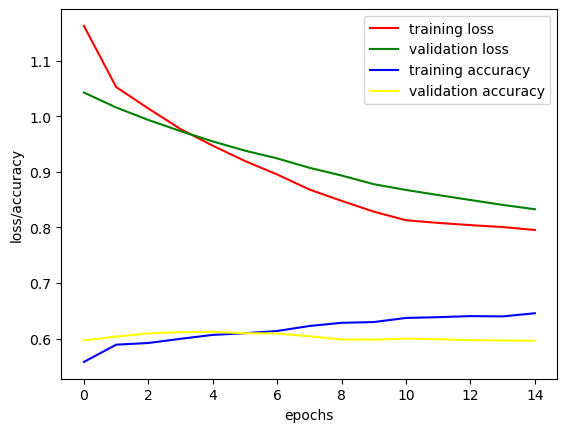

In [967]:
hist=history.history
plt.plot(hist['loss'],label='training loss',color='red')
plt.plot(hist['val_loss'],label="validation loss",color="green")
plt.plot(hist['accuracy'],label='training accuracy',color='blue')
plt.plot(hist['val_accuracy'],label="validation accuracy",color="yellow")
plt.xlabel("epochs")
plt.ylabel("loss/accuracy")
plt.legend()

In [969]:
y_pred=model.predict(x_test)
y_pred

294/294 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[9.9832594e-01],
       [6.7301835e-07],
       [1.0000000e+00],
       ...,
       [4.8231011e-24],
       [1.2992265e-29],
       [9.7144830e-01]], dtype=float32)

In [971]:
y_pred=((y_pred[:,0]>0.5).astype('int'))

In [973]:
y_pred

array([1, 0, 1, ..., 0, 0, 1])

In [975]:
accuracy_score(y_test,y_pred)

0.49893594381783357

In [309]:
import joblib

In [311]:
encoders = {
    'Course': Course,
    'Lead Source': LeadSource,
    'Last Activity': LastActivity,
    'Occupation': Occupation,
    'Tags': Tags,
    'Lead Quality': LeadQuality,
    'Preferred Contact Method': PreferredContactMethod,
    'Qualification': Qualification,
    'City': co1,
    'Country': co
}

# Serialize the encoders to a file
with open('label_encoders.pkl', 'wb') as file:
    pickle.dump(encoders, file)

print("Label encoders saved to 'label_encoders.pkl'.")

Label encoders saved to 'label_encoders.pkl'.


In [313]:
joblib.dump(model, 'adaboost.joblib')

['adaboost.joblib']

In [315]:
catcol

Index(['Name', 'Course', 'Lead Source', 'Last Activity', 'Country', 'City',
       'Occupation', 'Tags', 'Lead Quality', 'Preferred Contact Method',
       'Qualification'],
      dtype='object')

In [317]:
import pickle

In [319]:
pickle.dump(model5, open('model1.pkl','wb'))

In [321]:
model5 = AdaBoostClassifier(random_state=42,learning_rate=0.1,n_estimators=200)
model5.fit(x_train, y_train)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=0.1, n_estimators=200, random_state=42)

In [322]:
y_pred=model5.predict(x_test)
accuracy_score(y_test,y_pred)

0.6002

In [1093]:
data['Converted'].value_counts()

Converted
1    23570
0    23417
Name: count, dtype: int64